In [103]:
import sunpy
import sunpy.map
import numpy as np
import pandas as pd
import sunpy.net.attrs as a
from sunpy.net import Fido
import sunpy_soar
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import propagate_with_solar_surface, Helioprojective
import requests
import matplotlib.pyplot as plt

In [2]:
eis_list_file = "../../src/EIS/eis_obs_list.xlsx"

In [5]:
eis_list_df = pd.read_excel(eis_list_file, sheet_name="Sheet1")
eis_list_df

,obs_start,obs_end,texp,stud_acr,repeat,fovx,fovy,cdelt1,des
0,2022-10-19 18:26:00,2022-10-19 22:37:00,10,HH_Flare+AR_180x152H,48,180,152,6,"fast, sparse scan, minimal lines"
1,2022-10-20 03:44:00,2022-10-20 04:47:00,60,DHB_007_v2,1,248,512,4,"slow scan, long slit, large FOV, more lines"
2,2022-10-20 07:05:00,2022-10-20 11:05:00,10,HH_Flare+AR_180x152H,40,180,152,6,"fast, sparse scan, minimal lines"
3,2022-10-20 18:54:00,2022-10-20 20:03:00,10,HH_Flare+AR_180x152H,13,180,152,6,"fast, sparse scan, minimal lines"
4,2022-10-20 23:43:00,2022-10-21 02:12:00,60,DHB_007_v2,2,248,512,4,"slow scan, long slit, large FOV, more lines"
5,2022-10-21 03:15:00,2022-10-21 05:12:00,10,HH_Flare+AR_180x152H,22,180,152,6,"fast, sparse scan, minimal lines"
6,2022-10-21 06:12:00,2022-10-21 17:14:00,10,HH_Flare+AR_180x152H,124,180,152,6,"fast, sparse scan, minimal lines"
7,2022-10-21 18:14:00,2022-10-21 22:41:00,10,HH_Flare+AR_180x152H,50,180,152,6,"fast, sparse scan, minimal lines"
8,2022-10-22 06:30:00,2022-10-22 07:35:00,60,DHB_007_v2,1,248,512,4,"slow scan, long slit, large FOV, more lines"
9,2022-10-22 08:08:00,2022-10-22 10:43:00,10,HH_Flare+AR_180x152H,25,180,152,6,"fast, sparse scan, minimal lines"


In [49]:
def get_hri_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("EUI")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("eui-hrieuv174-image") | a.soar.Product("eui-hrieuvzer-image")

    result = Fido.search(instrument & time & level & product)
    

    hri_time_slots = []

    for result_ in result:
        time_start = Time(result_['Start time'])
        time_end = Time(result_['End time'])
        for ii in range(8):
            time_interval = Time((Time(date_begin) + ii*u.day, Time(date_begin) + (ii+1)*u.day))
            time_start_subset = time_start[(time_start > time_interval[0]) & (time_start < time_interval[1])]
            time_end_subset = time_end[(time_end > time_interval[0]) & (time_end < time_interval[1])]

            if len(time_start_subset) > 0:
                hri_time_slots.append(Time((np.min(time_start_subset), np.max(time_end_subset))))
            
    return result, hri_time_slots

In [50]:
hri_list, hri_time_slots = get_hri_list()

In [52]:
def get_fsi_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("EUI")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("eui-fsi174-image")

    result = Fido.search(instrument & time & level & product)
    
    return result

In [54]:
fsi_list = get_fsi_list()

In [55]:
def get_phi_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("PHI")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("phi-hrt-blos")

    result = Fido.search(instrument & time & level & product)
    
    return result

In [56]:
phi_list = get_phi_list()

In [66]:
def get_spice_list(date_begin='2022-10-18', date_end='2022-10-26'):
    instrument = a.Instrument("SPICE")
    time = a.Time(date_begin, date_end)
    level = a.Level(2)
    product = a.soar.Product("spice-n-ras")

    result = Fido.search(instrument & time & level & product)[0]

    long_raster_mask = Time(result['End time']) - Time(result['Start time']) > 1*u.hr

    return result[long_raster_mask], result[~long_raster_mask]

In [67]:
spice_long_list, spice_short_list = get_spice_list()

In [80]:
def get_iris_observe_ar(xcen, ycen, date_obs):
    if isinstance(date_obs, str):
        date_obs = Time(date_obs)
    reference_point = SkyCoord(-900*u.arcsec,250*u.arcsec, frame="helioprojective", obstime=Time('2022-10-19T20:00'))
    obs_frame = Helioprojective(observer="earth", obstime=date_obs)
    with propagate_with_solar_surface(reference_point):
        reference_point_rotate = reference_point.transform_to(obs_frame)
    
    if np.sqrt((reference_point_rotate.Tx - xcen)**2 + (reference_point_rotate.Ty - ycen)**2) < 150*u.arcsec:
        return True


In [101]:
def get_iris_list():
    hcr = requests.get('https://www.lmsal.com/hek/hcr?cmd=search-events3&outputformat=json'
                       '&startTime=2022-10-19T00:00&stopTime=2022-10-26T00:00&hasData=true'
                       '&hideMostLimbScans=true&obsDesc=orbiter&limit=200')
    hcr = hcr.json()
    iris_time_interval = []
    for event in hcr['Events']:
        iris_time_interval.append(Time((event['startTime'], event['stopTime'])))

    return iris_time_interval

In [102]:
iris_time_intervals = get_iris_list()

In [111]:
hri_time_slots[0][0].to_datetime()

datetime.datetime(2022, 10, 19, 19, 0, 0, 165000)

2022-10-18 03:15:03.191 2022-10-18 03:16:28.519
2022-10-18 04:15:03.335 2022-10-18 04:16:28.943
2022-10-18 05:15:09.912 2022-10-18 05:16:35.672
2022-10-18 06:15:03.348 2022-10-18 06:16:28.626
2022-10-18 07:15:10.026 2022-10-18 07:16:35.446
2022-10-18 08:15:03.799 2022-10-18 08:16:29.201
2022-10-18 09:15:09.405 2022-10-18 09:16:34.793
2022-10-18 10:15:03.374 2022-10-18 10:16:28.788
2022-10-18 11:15:09.393 2022-10-18 11:16:35.093
2022-10-18 12:15:03.390 2022-10-18 12:16:28.804
2022-10-18 13:15:09.324 2022-10-18 13:16:34.696
2022-10-18 14:15:03.403 2022-10-18 14:16:28.613
2022-10-18 15:15:09.547 2022-10-18 15:16:35.007
2022-10-18 16:15:03.413 2022-10-18 16:16:28.659
2022-10-18 17:15:09.580 2022-10-18 17:16:35.004
2022-10-18 18:15:03.284 2022-10-18 18:16:28.266
2022-10-18 19:15:03.370 2022-10-18 19:16:28.674
2022-10-18 20:15:03.347 2022-10-18 20:16:28.679
2022-10-18 21:15:03.521 2022-10-18 21:16:29.011
2022-10-18 22:15:09.657 2022-10-18 22:16:35.317
2022-10-18 23:15:02.629 2022-10-18 23:16

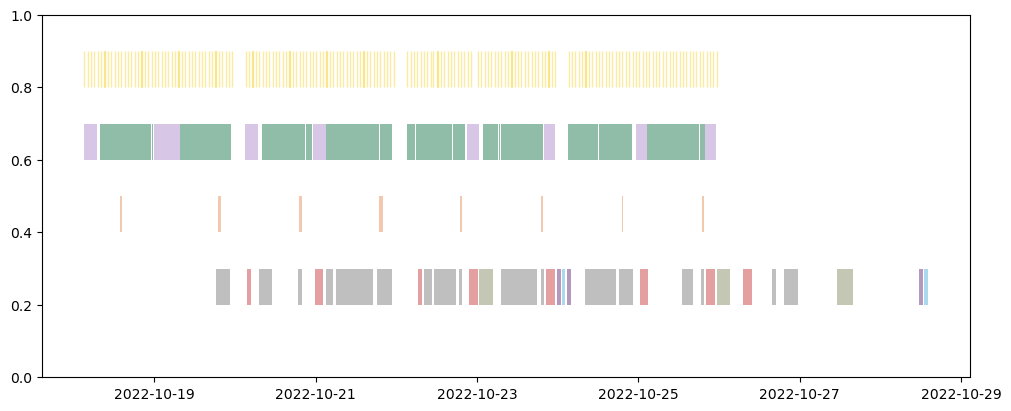

In [128]:
fig, ax = plt.subplots(figsize=(10,4),constrained_layout=True)

color_dict = {"HH_Flare+AR_180x152H":"grey","DHB_007_v2":"#CB4042",
              "EL_DHB_01":"#89916B","HPW021VEL260x512v2":"#66327C",
              "Atlas_60":"#58B2DC"}

for ii, row_ in eis_list_df.iterrows():
    ax.axvspan(row_["obs_start"], row_["obs_end"], 0.2, 0.3, alpha=0.5, color=color_dict[row_["stud_acr"]],
               label=row_["stud_acr"],linewidth=0)
    
for hri_slot in hri_time_slots:
    ax.axvspan(hri_slot[0].to_datetime(),
               hri_slot[1].to_datetime(), 0.4, 0.5, alpha=0.5, color="#E79460",label="EUI HRI",
               linewidth=0)
    
for spice_long_ in spice_long_list:
    ax.axvspan(spice_long_["Start time"], spice_long_["End time"], 0.6, 0.7, alpha=0.5, color="#B28FCE",label="SPICE Long",
               linewidth=0)
    
for spice_short_ in spice_short_list:
    ax.axvspan(spice_short_["Start time"], spice_short_["End time"], 0.6, 0.7, alpha=0.5, color="#227D51",label="SPICE Short",
               linewidth=0)

for phi_ in phi_list[0]:
    ax.axvspan(Time(phi_["Start time"]).to_datetime(), Time(phi_["End time"]).to_datetime(), 0.8, 0.9, alpha=0.5, color="#F7D842",label="PHI",
               )
    print(phi_["Start time"], phi_["End time"])

# for ii, row_ in eui_list_df.iterrows():
#     ax.axvspan(row_["obs_start"], row_["obs_end"], ymin=0.4, ymax=0.6, alpha=0.5, color="#E79460",label="EUI")


# handles, labels = ax.get_legend_handles_labels()
# temp_dict = {k:v for k,v in zip(labels,handles)}
# ax.legend(temp_dict.values(), temp_dict.keys(), loc="upper left", bbox_to_anchor=(0,1.04,1,0.1), ncol=6,
#           mode="expand", frameon=False)

In [124]:
phi_list[0]

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str12,str2,str23,str23,str36,str45,float64,str30
PHI,phi-hrt-blos,L2,2022-10-18 03:15:03.191,2022-10-18 03:16:28.519,solo_L2_phi-hrt-blos_20221018T031503,solo_L2_phi-hrt-blos_20221018T031503_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 04:15:03.335,2022-10-18 04:16:28.943,solo_L2_phi-hrt-blos_20221018T041503,solo_L2_phi-hrt-blos_20221018T041503_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 05:15:09.912,2022-10-18 05:16:35.672,solo_L2_phi-hrt-blos_20221018T051509,solo_L2_phi-hrt-blos_20221018T051509_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 06:15:03.348,2022-10-18 06:16:28.626,solo_L2_phi-hrt-blos_20221018T061503,solo_L2_phi-hrt-blos_20221018T061503_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 07:15:10.026,2022-10-18 07:16:35.446,solo_L2_phi-hrt-blos_20221018T071510,solo_L2_phi-hrt-blos_20221018T071510_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 08:15:03.799,2022-10-18 08:16:29.201,solo_L2_phi-hrt-blos_20221018T081503,solo_L2_phi-hrt-blos_20221018T081503_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 09:15:09.405,2022-10-18 09:16:34.793,solo_L2_phi-hrt-blos_20221018T091509,solo_L2_phi-hrt-blos_20221018T091509_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
PHI,phi-hrt-blos,L2,2022-10-18 10:15:03.374,2022-10-18 10:16:28.788,solo_L2_phi-hrt-blos_20221018T101503,solo_L2_phi-hrt-blos_20221018T101503_V01.fits,16.992,R_SMALL_MRES_MCAD_AR-Long-Term
